### Testing parameters of wavelet coherence

Here we will test which are the best parameters to use the wavelet analysis on the LFP data.

In [2]:
%matplotlib inline

import numpy               as     np
import matplotlib.pyplot   as     plt
from GDa.spectral_analysis import spectral, spectral_analysis
from GDa.session           import session

In [4]:
# Instantiating a spectral analysis class
ses = session(raw_path = 'GrayLab/', monkey = 'lucy', stype = 'samplecor', date = '150128', 
              session = 1, evt_dt = [-0.65,3.00])

ses.read_session_info()
ses.read_lfp_data()

# Range of frequencies to be analyzed
freqs = np.arange(6,100,1)
# Delta for downsampling
delta = 15

spec = spectral_analysis(session = ses, path = None, freqs = freqs, delta=15)

In [12]:
# Morlet
Sxx_ml, Syy_ml, Sxy_ml = spec._wavelet_spectrum(trial = 0, 
                                                index_channel1 = 10, 
                                                index_channel2 = 30, 
                                                n_cycles = freqs/2.0, 
                                                win_time=500, win_freq=1, time_bandwidth = None, 
                                                method = 'morlet', n_jobs = -1)
# Multitaper
Sxx_mt, Syy_mt, Sxy_mt = spec._wavelet_spectrum(trial = 0, 
                                                index_channel1 = 10, 
                                                index_channel2 = 30, 
                                                n_cycles = freqs/2.0, 
                                                win_time=500, win_freq=1, time_bandwidth = 8.0, 
                                                method = 'multitaper', n_jobs = -1)

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.5s finished
[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   1 out of   1 | elapsed:    1.5s finished


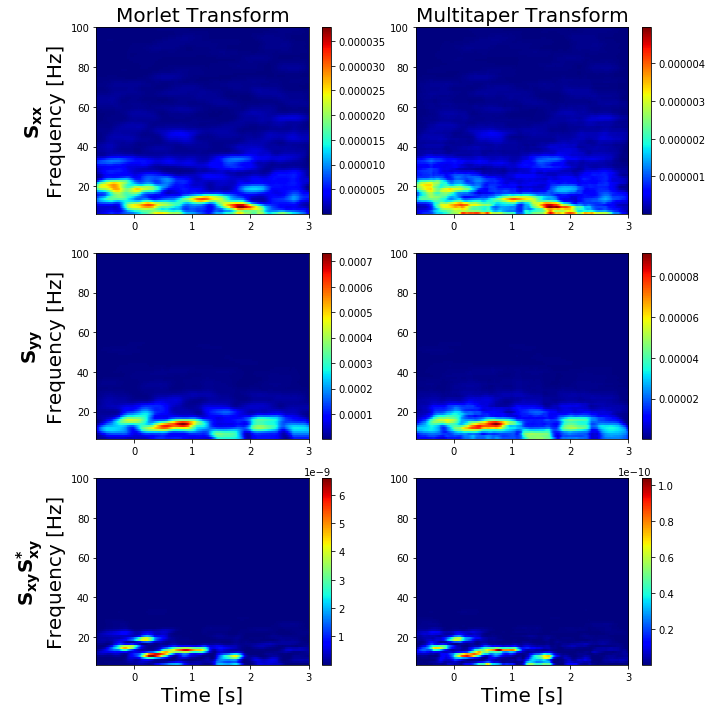

In [14]:
plt.figure(figsize=(10,10))
# Sxx
plt.subplot(3,2,1)
plt.imshow(Sxx_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()
plt.title('Morlet Transform', fontsize=20)
plt.ylabel(r"$\bf{S_{xx}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,2,2)
plt.imshow(Sxx_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()
plt.title('Multitaper Transform', fontsize=20)

# Syy
plt.subplot(3,2,3)
plt.imshow(Syy_ml.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()
plt.ylabel(r"$\bf{S_{yy}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.subplot(3,2,4)
plt.imshow(Syy_mt.real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()

# Sxy
plt.subplot(3,2,5)
plt.imshow((Sxy_ml*np.conj(Sxy_ml)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()
plt.ylabel(r"$\bf{S_{xy}S_{xy}^{*}}$" + "\n" + "Frequency [Hz]", fontsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.subplot(3,2,6)
plt.imshow((Sxy_mt*np.conj(Sxy_mt)).real, aspect='auto', cmap='jet', origin='lower', extent=[-0.65,3.00,6,100]);plt.colorbar()
plt.xlabel('Time [s]', fontsize=20)
plt.tight_layout()